
## Introduction to Finite Element Methods - Exercise Class

### DST Module 4 - November 2018

### James Kermode

<b>j.r.kermode@warwick.ac.uk</b>

Warwick Centre for Predictive Modelling / School of Engineering

## Setup code

Startup code for examples and visualisations

In [345]:
using QuadGK
using Plots
using LaTeXStrings
pyplot();

## Parameters

In [356]:
L = 10.0
E = 100.0
A = 1.0
n_cells = 10

10

## Main solver routine

In [357]:
function solver(L, f, n_cells; quad_degree=3)
    n_nodes = n_cells + 1
    mesh = linspace(0.0, L, n_nodes)
    h = L/n_cells
    k_e = (E*A/h)*[ 1 -1; -1 1]
    K = zeros(n_nodes, n_nodes)
    for element in 1:n_cells
        K[element:element + 1, element:element + 1] += k_e
    end
    quad_points, quad_weights = gauss(Float64, quad_degree)
    b = zeros(n_nodes)
    for element in 1:n_cells
        x_mid = (mesh[element + 1] + mesh[element])/2.0    
        for (zeta, weight) in zip(quad_points, quad_weights)    
            x = x_mid + zeta*h/2.0
            w = weight*(h/2.0)
            b[element] += w*(0.5 - zeta/2.0)*f(x) 
            b[element + 1] += w*(0.5 + zeta/2.0)*f(x)
        end
    end
    K[1, :], K[:, 1], K[1, 1] = 0.0, 0.0, 1.0
    b[1] = 0.0
    return K \ b, mesh
end

solver (generic function with 1 method)

## Visualisation of solution

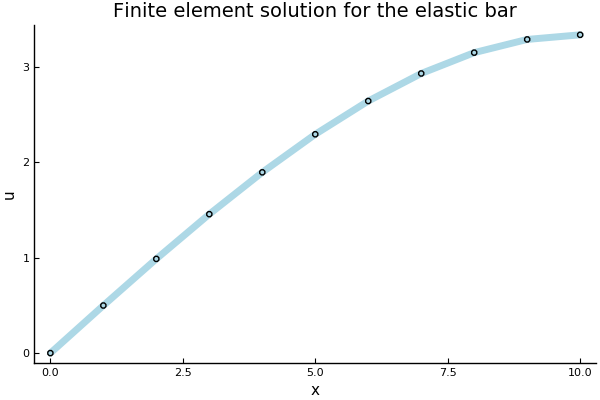

In [358]:
u, mesh = solver(L, identity, n_cells)
plot(mesh, u, marker=:o, xlabel=:x, lw=5, ylabel=:u, leg=false, 
     grid=false, title="Finite element solution for the elastic bar", c=[:lightblue])

## Mesh convergence - $h$-refinement

Use the solver with the loading function $f(x) = \sin(x)$ to demonstrate that the error in the displacement at the right hand end of the rod scales as $h^{2p}$ when the quadrature is performed to order $p$.

Adapt the code given below, replacing the `...` sections.

Plot a graph of the displacement error vs. $h$ to illustrate your results for $p=1,2,3$.

Now try changing $f(x)$ to something which can be integrated exactly with piecewise linear or quadratic elements. What do you notice?

In [ ]:
n_cells = ... # range of sizes to use for convergence test
n_cell_ref = ... # size to use for reference results

plot(title="Mesh convergence")
for (p, color) in zip([1, 2, 3], 
                       [:red, :green, :blue])
    
    # Compute solutions at a range of sizes
    solutions = [solver(L, sin, n, quad_degree=p) for n in n_cells]    
    
    # Compute a reference solution
    ref_u, ref_mesh = solver(L, sin, n_cell_ref, quad_degree=p)
        
    hs = [... for (u, mesh) in solutions ] # find the element size h for each solution
    err = [... for (u, mesh) in solutions] # find the error in displacement at end for each

    # Plot results
    plot!(hs, err, lw=2, legend=true,
          marker=:o, ms=5, yscale=:log10, xscale=:log10,
          xlabel="log h", ylabel="log error", c=[color], label="p=$p")

    # Plot dashed lines to show expected rates
    C = err[end] / (hs[end]^(2*p))
    plot!(hs, C*hs.^(2.0*p), label="h^$(2*p)", 
          line=(1, :dash, color), c=[color])
end
current()